#          Project Of Data Science

## Submitted by: 

## Kripa Shrestha (ACE080BCT032)

## Anushka Aryal (ACE080BCT014)

## Aayusha Kunwor (ACE080BCT005)

Initial Dataset:
   GENDER  AGE  SMOKING  YELLOW_FINGERS  ANXIETY  PEER_PRESSURE  \
0      M   69        1               2        2              1   
1      M   74        2               1        1              1   
2      F   59        1               1        1              2   
3      M   63        2               2        2              1   
4      F   63        1               2        1              1   

   CHRONIC DISEASE  FATIGUE   ALLERGY   WHEEZING  ALCOHOL CONSUMING  COUGHING  \
0                1         2         1         2                  2         2   
1                2         2         2         1                  1         1   
2                1         2         1         2                  1         2   
3                1         1         1         1                  2         1   
4                1         1         1         2                  1         2   

   SHORTNESS OF BREATH  SWALLOWING DIFFICULTY  CHEST PAIN LUNG_CANCER  
0                    2    

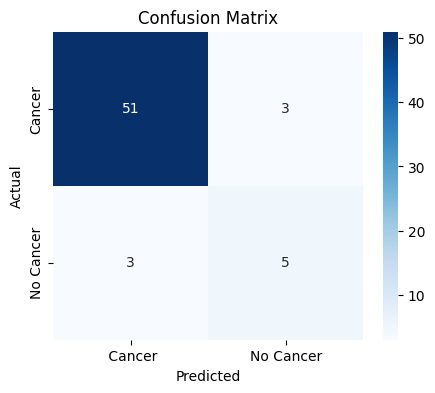

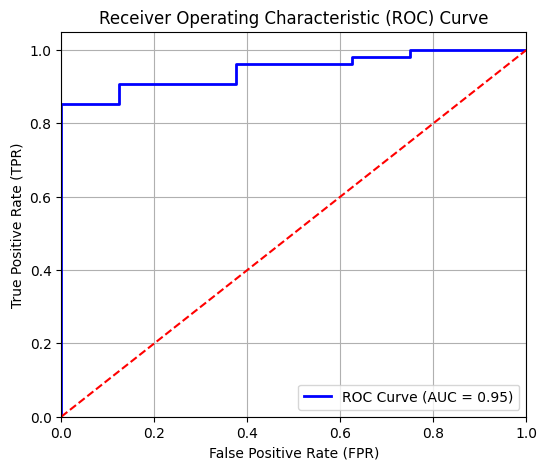

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc

data = pd.read_csv('survey lung cancer.csv')

print("Initial Dataset:\n", data.head())

data['GENDER'] = data['GENDER'].map({'M': 1, 'F': 0}) 
data['LUNG_CANCER'] = data['LUNG_CANCER'].map({'YES': 1, 'NO': 0}) 

X = data.drop(columns=['LUNG_CANCER'])
y = data['LUNG_CANCER'] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)

y_prob = logreg.predict_proba(X_test)[:, 1] 

y_pred = (y_prob >= 0.5).astype(int)

accuracy = accuracy_score(y_test, y_pred)
print(f"\nModel Accuracy: {accuracy:.2f}")

conf_matrix = confusion_matrix(y_test, y_pred, labels=[1, 0])
print("\nConfusion Matrix:\n", conf_matrix)

class_report = classification_report(y_test, y_pred)
print("\nClassification Report:\n", class_report)

plt.figure(figsize=(5, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',  xticklabels=[' Cancer', 'No Cancer'],  yticklabels=['Cancer', 'No Cancer']) 
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

fpr, tpr, _ = roc_curve(y_test, y_prob)  
roc_auc = auc(fpr, tpr) 

plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--') 
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()
